In [2]:
import pandas as pd
import requests ,json 

In [9]:
#  네이버랩가지고오기
#  1. 앱 키 
CLIENT_ID , CLIENT_SECRET = 'Zdd_xJ3zOXMjhFVyunEB' ,'BRnHmGrUwM'

In [12]:
#  2. url 확인 parms , headers 
# post 방식임 
url = 'https://openapi.naver.com/v1/datalab/search'

In [15]:
params = { 
       'startDate' : '2018-01-01',
        'endDate' : '2022-07-31',
        'timeUnit' : 'month',
        'keywordGroups' :[ 
            {'groupName' :'트위터', 'keywords': ['트위터','트윗']},
            {'groupName' :'페이스북', 'keywords': ['페이스북','페북']},
            {'groupName' :'인스타그램', 'keywords': ['인스타그램','인스타 ']}
            ]}

In [16]:
header = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET
}

In [42]:
#  3. requests  (url , params, headers)  - > response(json) : json(str)\
    #json.dumps(params), 파람스에 한글있으면 번역 
response = requests.post(url , json.dumps(params),headers=header)
response

<Response [200]>

In [19]:
response.text[:300]

'{"startDate":"2018-01-01","endDate":"2022-07-31","timeUnit":"month","results":[{"title":"트위터","keywords":["트위터","트윗"],"data":[{"period":"2018-01-01","ratio":14.59502},{"period":"2018-02-01","ratio":13.0238},{"period":"2018-03-01","ratio":12.97953},{"period":"2018-04-01","ratio":12.82991},{"period":"'

In [36]:
data[1]

{'title': '페이스북',
 'keywords': ['페이스북', '페북'],
 'data': [{'period': '2018-01-01', 'ratio': 97.80481},
  {'period': '2018-02-01', 'ratio': 89.05814},
  {'period': '2018-03-01', 'ratio': 98.84292},
  {'period': '2018-04-01', 'ratio': 100},
  {'period': '2018-05-01', 'ratio': 92.23588},
  {'period': '2018-06-01', 'ratio': 91.70143},
  {'period': '2018-07-01', 'ratio': 87.916},
  {'period': '2018-08-01', 'ratio': 83.56488},
  {'period': '2018-09-01', 'ratio': 82.66018},
  {'period': '2018-10-01', 'ratio': 81.30381},
  {'period': '2018-11-01', 'ratio': 76.80167},
  {'period': '2018-12-01', 'ratio': 75.43269},
  {'period': '2019-01-01', 'ratio': 70.21709},
  {'period': '2019-02-01', 'ratio': 62.57096},
  {'period': '2019-03-01', 'ratio': 70.02431},
  {'period': '2019-04-01', 'ratio': 71.67271},
  {'period': '2019-05-01', 'ratio': 67.79872},
  {'period': '2019-06-01', 'ratio': 69.23259},
  {'period': '2019-07-01', 'ratio': 64.22088},
  {'period': '2019-08-01', 'ratio': 61.74662},
  {'period':

In [ ]:
#  4.json(str) - > preprocesiing  -> DataFrame 
data=response.json()['results']
[period['period'] for period in data[0]['data']]

df = pd.DataFrame({
    'date': [period['period'] for period in data[0]['data']],
    'tiwiter': [ratio['ratio'] for ratio in data[0]['data']],
    'facebook': [ratio['ratio'] for ratio in data[1]['data']],
    'instagram': [ratio['ratio'] for ratio in data[2]['data']],
})
df

In [29]:
result = [ ]
for num in range(10):
    if num % 2 : 
        result.append(num**2)


result   

[1, 9, 25, 49, 81]

In [31]:
result = [num**2 for num in range(10) if num % 2]
result

[1, 9, 25, 49, 81]

<AxesSubplot:>

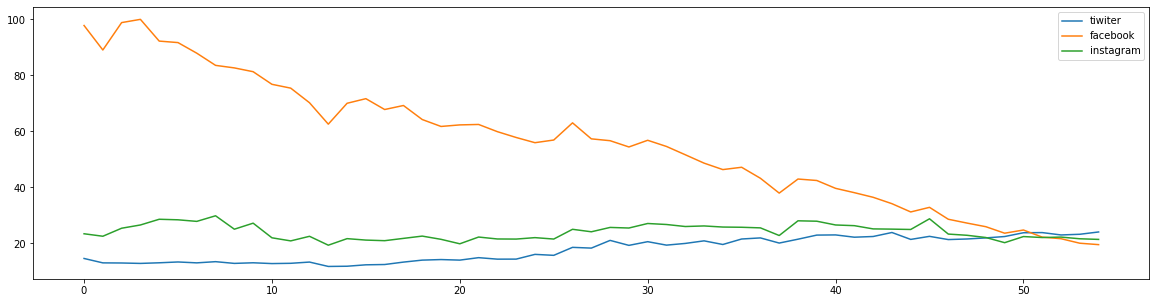

In [41]:
#  5. visualiztion 
df.plot(figsize=(20,5))

In [ ]:
# 카카오 api 사용 주소입력하면 위도경도 우편번호  또는 그 반대로 나오는 API
